In [10]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [11]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [12]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning     

In [13]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Select your features (columns)     

In [14]:
# Set features. This will also be used as your x values.
X = df.drop(columns='koi_disposition')
y = df['koi_disposition']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [18]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8439824527942018
Testing Data Score: 0.8415331807780321


In [70]:
svm_model.coef_

array([[  5.61515566,  -5.61515566,   5.61728034,  -5.61728034,
          5.53978773,  -3.64992631,   3.46519156,  -3.11686899,
          2.74108084,   2.69297021,  -1.01015563,  -1.20150795,
          1.20150795,  -0.83705129,  -1.60629988,   1.75572719,
         -1.65798123,  -2.67799854,  -1.82151849,  -2.34382435],
       [  1.57448838,  -1.57448838,   1.9356426 ,  -1.9356426 ,
         -5.52448928,  -4.72250699,   2.73199262,   1.17394852,
        -10.27895484,  -1.67683573,   4.82936652,  -0.42481868,
          0.42481868,   0.12638126,  -0.33358597,  -0.13417826,
         -5.36238592,   2.30758736,  -7.67170875,  -1.23519323],
       [ -2.68743957,   2.68743957,  -1.20411131,   1.20411131,
         -8.48005391,  -2.24127348,  -1.28607283,   2.94835753,
        -10.23598088,  -4.94654307,   3.2944912 ,   0.57020544,
         -0.57020544,   0.60506362,   0.95219057,  -1.87630182,
         -2.31784433,   4.5469373 ,  -6.09973078,   0.49033301]])

In [72]:
from matplotlib import pyplot as plt
from sklearn import svm


importances = svm_model.feature_importances_
importances


AttributeError: 'SVC' object has no attribute 'feature_importances_'

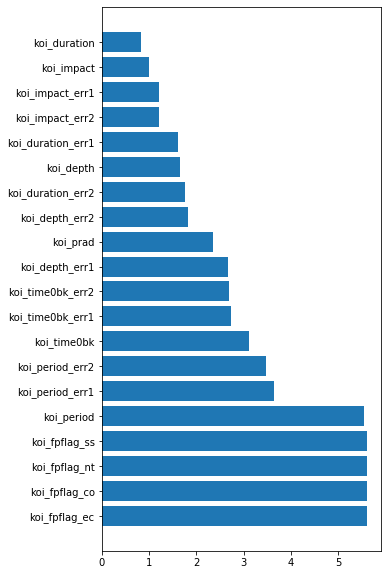

In [68]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.rcParams['figure.figsize']=(5, 10)
    plt.show()
    
feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'] 

svm_model.fit(X_train_scaled, y_train)
f_importances(abs(svm_model.coef_[0]), feature_names, top=20)


In [38]:
Xsel = X[['koi_duration_err1', 'koi_duration_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
         'koi_steff_err1', 'koi_duration', 'koi_period', 'koi_steff_err2', 'koi_teq', 'koi_impact_err1',
         'koi_tce_plnt_num', 'koi_period_err2', 'koi_period_err1', 'koi_time0bk', 'koi_slogg_err2',
         'koi_srad_err1', 'koi_fpflag_nt', 'koi_steff', 'koi_model_snr', 'koi_slogg']]
Xsel

,koi_duration_err1,koi_duration_err2,koi_time0bk_err1,koi_time0bk_err2,koi_steff_err1,koi_duration,koi_period,koi_steff_err2,koi_teq,koi_impact_err1,koi_tce_plnt_num,koi_period_err2,koi_period_err1,koi_time0bk,koi_slogg_err2,koi_srad_err1,koi_fpflag_nt,koi_steff,koi_model_snr,koi_slogg
0,0.11600,-0.11600,0.003520,-0.003520,81,4.50700,54.418383,-81,443,0.059,2,-2.479000e-04,2.479000e-04,162.513840,-0.096,0.105,0,5455,25.8,4.467
1,0.03410,-0.03410,0.000581,-0.000581,158,1.78220,19.899140,-176,638,5.126,1,-1.490000e-05,1.490000e-05,175.850252,-0.176,0.233,0,5853,76.3,4.544
2,0.00537,-0.00537,0.000115,-0.000115,157,2.40641,1.736952,-174,1395,0.115,1,-2.630000e-07,2.630000e-07,170.307565,-0.168,0.201,0,5805,505.6,4.564
3,0.04200,-0.04200,0.001130,-0.001130,169,1.65450,2.525592,-211,1406,0.235,1,-3.760000e-06,3.760000e-06,171.595550,-0.210,0.334,0,6031,40.9,4.438
4,0.06730,-0.06730,0.001900,-0.001900,189,3.14020,4.134435,-232,1160,0.139,2,-1.050000e-05,1.050000e-05,172.979370,-0.229,0.315,0,6046,40.2,4.486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.63400,-0.63400,0.015700,-0.015700,169,4.80600,8.589871,-152,929,0.023,1,-1.846000e-04,1.846000e-04,132.016100,-0.189,0.313,0,5638,8.4,4.296
6987,0.01740,-0.01740,0.000170,-0.000170,139,3.22210,0.527699,-166,2088,0.051,1,-1.160000e-07,1.160000e-07,131.705093,-0.196,0.237,0,5638,453.3,4.529
6988,0.22900,-0.22900,0.007690,-0.007690,165,3.11400,1.739849,-220,1608,0.423,1,-1.780000e-05,1.780000e-05,133.001270,-0.224,0.341,0,6119,10.6,4.444
6989,0.16200,-0.16200,0.002850,-0.002850,193,0.86500,0.681402,-236,2218,0.309,1,-2.430000e-06,2.430000e-06,132.181750,-0.224,0.341,0,6173,12.3,4.447


## Create a Train Test Split     
*Use koi_disposition for the y values*

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xsel, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model     
---------------

In [42]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7098989128361625
Testing Data Score: 0.715675057208238


In [ ]:
svm_model.coef_

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'] 

svm_model.fit(X_train_scaled, y_train)
f_importances(abs(svm_model.coef_[0]), feature_names, top=10)
print(f_importances)

In [ ]:
df.columns

## Hyperparameter Tuning     
*Use GridSearchCV to tune the model's parameters*

In [44]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 2500], 'tol': [.02]} 
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [45]:
# Train the model with GridSearch
gs = grid.fit(X_train_scaled,y_train)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, tol=0.02 ...................................................
[CV] ....................... C=1, tol=0.02, score=0.702, total=   0.4s
[CV] C=1, tol=0.02 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ....................... C=1, tol=0.02, score=0.688, total=   0.4s
[CV] C=1, tol=0.02 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... C=1, tol=0.02, score=0.707, total=   0.4s
[CV] C=5, tol=0.02 ...................................................
[CV] ....................... C=5, tol=0.02, score=0.733, total=   0.3s
[CV] C=5, tol=0.02 ...................................................
[CV] ....................... C=5, tol=0.02, score=0.720, total=   0.3s
[CV] C=5, tol=0.02 ...................................................
[CV] ....................... C=5, tol=0.02, score=0.740, total=   0.3s
[CV] C=10, tol=0.02 ..................................................
[CV] ...................... C=10, tol=0.02, score=0.745, total=   0.3s
[CV] C=10, tol=0.02 ..................................................
[CV] ...................... C=10, tol=0.02, score=0.737, total=   0.5s
[CV] C=10, tol=0.02 ..................................................
[CV] ...................... C=10, tol=0.02, score=0.748, total=   0.3s
[CV] C=2500, tol=0.02 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.9s finished


In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 2500, 'tol': 0.02}
0.7688346366584017


In [47]:
# Print out classifications report
predictions = gs.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.65      0.56      0.60       422
     CONFIRMED       0.68      0.77      0.72       450
FALSE POSITIVE       0.87      0.86      0.87       876

      accuracy                           0.77      1748
     macro avg       0.73      0.73      0.73      1748
  weighted avg       0.77      0.77      0.76      1748



## Save the Model     
----------------

In [ ]:
import joblib
filename = 'Model_Files/SVM_final.sav'
joblib.dump(grid, filename)